# demonstrate why going to higher samp rates is good in the presence of noise

In [1]:
# general libs we'll use
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## here pick a fixed temporal interval and a fixed noise level and look at variability of amplitude estimates as a function of sampling rate. Note that frequency resolution does not change as a function of sample rate (just the max freq that can be estimated changes - see notes below right before the first 'for' loop). However, even though freq resolution doesn't change as samp rate gets higher you will be better able to more reliably  recover the amplitude of an oscillation in the presence of noise. You can think about this as a curve fitting problem - the more points you have to fit the more stable your fit is going to be.   

Frequency resolution at each samp rate:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5]


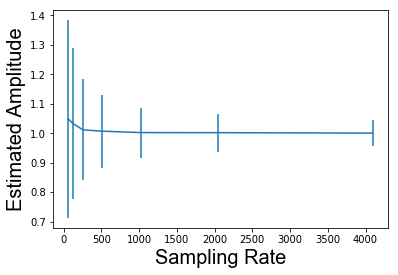

In [2]:
sr = np.array([64, 128, 256, 512, 1024, 2048, 4096])  # samp rate in Hz
f = 24                          # frequency of signal 
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
noise_amp = 10                  # amplitude of additive IID noise (this is actually 2*amp of noise)
num_iterations = 500            # how many times to loop to eval impact of noise as a function of 

# little note on frequency resolution - function of number of data samples and sample rate
num_data_samps = sr * tmax      # just samp rate * how many seconds of data
# freq resolution...note that the ONLY thing that increases freq resolution is more time!
# for a fixed amount of time the increase in sr and the length of data scale proportionally. 
fstepSz = sr / num_data_samps   
print('Frequency resolution at each samp rate: ', fstepSz)

# allocate arrray to store amp at target frequency f
amp = np.zeros((num_iterations,len(sr)))

# loop over iterations to get an estimate of variaiblity of amp estimates at a given noise level. 
for j in range(num_iterations):
    
    # then loop over sample rates...
    for i in range(len(sr)):
        t = np.arange(0,tmax,dt[i])        # time axis

        # make a sin wave
        sw = np.sin(2*pi*f*t) 

        # add some noise. 
        sw = sw + (np.random.rand((len(sw))) - .5) * noise_amp

        # FFT, with * dt to normalize the amplitude for number of samples in timeseries  
        # sp = np.fft.rfft(sw) * dt[i]     
        sp = (np.abs(np.fft.rfft(sw)) / len(sw)) * 2

        # get your freq axis
        freq = np.fft.rfftfreq(sw.size, dt[i])        

        # find the nearest value to your target frequency (in this first example it should always be spot on)
        ind = np.argmin(np.abs(f-freq))

        amp[j,i] = sp[ind]

mean_amp = np.mean(amp,0)
std_amp = np.std(amp,0)
plt.errorbar(sr, mean_amp, std_amp)
plt.xlabel('Sampling Rate', **fig_font)
plt.ylabel('Estimated Amplitude', **fig_font)
plt.show()